In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os, math

In [2]:
def edge_detect(file_name, tresh_min, tresh_max):
    f = plt.figure(figsize=(20,20))
    ax = f.add_subplot(131)
    ax2 = f.add_subplot(132)
    ax3 = f.add_subplot(133)
    
    image = cv2.imread(file_name)
    im_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, im_bw = cv2.threshold(im_bw, tresh_min, tresh_max, 0)
    contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(image)
    col = 0
    cv2.drawContours(image, contours, -1, (255,0,0), 2)
    ax2.imshow(im_bw)
    ax3.imshow(image)
    cv2.imwrite('cnt_'+file_name, image)
    print(len(contours))
    return contours

1


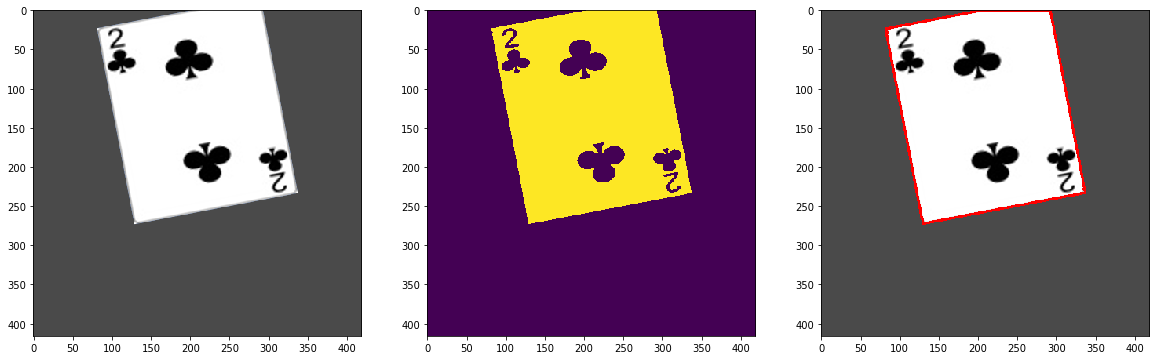

In [11]:
con = edge_detect('../Jungmin/test.png', 150, 255)

In [13]:
cv2.minAreaRect(con[0])

((208.897216796875, 127.98143768310547),
 (211.60107421875, 254.2362060546875),
 -10.804394721984863)

In [ ]:
con = edge_detect('../big_au/sample1/D6_0_7081.jpg', 150, 255)

In [ ]:
if w <= 0.8*h: # If card is vertically oriented
        temp_rect[0] = tl
        temp_rect[1] = tr
        temp_rect[2] = br
        temp_rect[3] = bl

    if w >= 1.2*h: # If card is horizontally oriented
        temp_rect[0] = bl
        temp_rect[1] = tl
        temp_rect[2] = tr
        temp_rect[3] = br

In [17]:
def perspective2(file_name):
    ## contours를 찾는 작업
    tresh_min = 100
    tresh_max = 255
    image = cv2.imread(file_name)
    im_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, im_bw = cv2.threshold(im_bw, tresh_min, tresh_max, 0)
    contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # 모서리를 찾는 작업
    rects = [cv2.minAreaRect(each) for each in contours]
    rects = [(a,b,c) for a, b, c  in rects if ((b[0]*b[1]>9000))]
    img2 = image.copy()
    for rect in rects:
        box = cv2.boxPoints(rect)
        box = box.astype('int')
        img2 = cv2.drawContours(img2, [box], -1, (0, 0, 255), 5)
        
    temp_rect = np.array(box, dtype = "float32")
    temp_rect = temp_rect[np.argsort(temp_rect[:, 1])]
    if temp_rect[0][0]>temp_rect[1][0]:
        temp = temp_rect[0].copy()
        temp_rect[0] = temp_rect[1]
        temp_rect[1] = temp
    if temp_rect[2][0]<temp_rect[3][0]:
        temp = temp_rect[2].copy()
        temp_rect[2] = temp_rect[3]
        temp_rect[3] = temp

    
    print(rects)
    print(box)
    # wrapPerspective 하는 작업
    maxWidth = 100
    maxHeight = 120
    dst = np.array([[0,0],[maxWidth-1,0],[maxWidth-1,maxHeight-1],[0, maxHeight-1]], np.float32)
    M = cv2.getPerspectiveTransform(temp_rect,dst)
    warp = cv2.warpPerspective(image, M, (maxWidth, maxHeight)) # warp에 이미지 담김
    
    # plt imshow로 그림그려줌
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    warp = cv2.cvtColor(warp,cv2.COLOR_BGR2RGB)
    plt.subplot(1,2,1)
    plt.imshow(image,cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(warp,cmap='gray')
    
    # wrap 이미지랑 꼭지점 담긴 행렬 돌려줌
    return warp, temp_rect

[((208.9223175048828, 127.96717071533203), (212.60614013671875, 255.12734985351562), -10.784297943115234)]
[[128 273]
 [ 80  22]
 [289 -17]
 [337 233]]


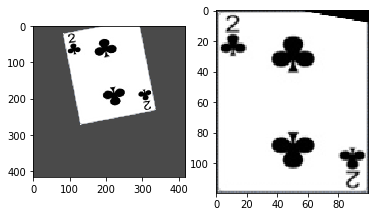

In [18]:
con = perspective2('../Jungmin/test.png')

In [19]:
def perspective2(file_name):
    ## contours를 찾는 작업
    tresh_min = 100
    tresh_max = 255
    image = cv2.imread(file_name)
    im_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, im_bw = cv2.threshold(im_bw, tresh_min, tresh_max, 0)
    contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # 모서리를 찾는 작업
    rects = [cv2.minAreaRect(each) for each in contours]
    rects = [(a,b,c) for a, b, c  in rects if ((b[0]*b[1]>9000))]
    img2 = image.copy()
    for rect in rects:
        box = cv2.boxPoints(rect)
        box = box.astype('int')
        img2 = cv2.drawContours(img2, [box], -1, (0, 0, 255), 5)
    temp_rect = np.array(box, dtype = "float32")
    temp_rect = temp_rect[np.argsort(temp_rect[:, 1])]
    if temp_rect[0][0]>temp_rect[1][0]:
        temp = temp_rect[0].copy()
        temp_rect[0] = temp_rect[1]
        temp_rect[1] = temp
    if temp_rect[2][0]<temp_rect[3][0]:
        temp = temp_rect[2].copy()
        temp_rect[2] = temp_rect[3]
        temp_rect[3] = temp
    # wrapPerspective 하는 작업
    maxWidth = 100
    maxHeight = 120
    dst = np.array([[0,0],[maxWidth-1,0],[maxWidth-1,maxHeight-1],[0, maxHeight-1]], np.float32)
    M = cv2.getPerspectiveTransform(temp_rect,dst)
    warp = cv2.warpPerspective(image, M, (maxWidth, maxHeight)) # warp에 이미지 담김
    warp = cv2.cvtColor(warp,cv2.COLOR_BGR2RGB)
    
    # wrap 이미지랑 꼭지점 담긴 행렬 돌려줌
    return warp, temp_rect

In [20]:
con = perspective2('../Jungmin/test.png')

In [33]:
def perspective_if_only_one_card(file_name):
    ## contour를 찾는 작업
    tresh_min = 100
    tresh_max = 255
    image = cv2.imread(file_name)
    im_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, im_bw = cv2.threshold(im_bw, tresh_min, tresh_max, 0)
    contour, hierarchy = cv2.findContours(im_bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # contour를 바탕으로 사각형의 좌표를 찾는 작업
    rect = cv2.minAreaRect(contour[0])
    box = cv2.boxPoints(rect)
    temp_rect = np.array(box, dtype = "float32")
    temp_rect = temp_rect[np.argsort(temp_rect[:, 1])]
    
    # If card is horizontally oriented
    if temp_rect[0][0]>temp_rect[1][0]:
        temp = temp_rect[0].copy()
        temp_rect[0] = temp_rect[1]
        temp_rect[1] = temp

    # If card is vertically oriented
    if temp_rect[2][0]<temp_rect[3][0]:
        temp = temp_rect[2].copy()
        temp_rect[2] = temp_rect[3]
        temp_rect[3] = temp
    
    # wrapPerspective 하는 작업
    maxWidth = 100
    maxHeight = 120
    dst = np.array([[0,0],[maxWidth-1,0],[maxWidth-1,maxHeight-1],[0, maxHeight-1]], np.float32)
    M = cv2.getPerspectiveTransform(temp_rect,dst)
    warp = cv2.warpPerspective(image, M, (maxWidth, maxHeight)) # warp에 이미지 담김
    warp = cv2.cvtColor(warp,cv2.COLOR_BGR2RGB)
    
    # wrap 이미지랑 꼭지점 담긴 행렬 돌려줌
    return warp, temp_rect

In [37]:
warp, temp_rect = perspective_if_only_one_card('../Jungmin/test.png')

In [39]:
temp_rect

array([[ 80.628   ,  22.547047],
       [289.47922 , -17.234146],
       [337.21664 , 233.3873  ],
       [128.36542 , 273.1685  ]], dtype=float32)